In [38]:
import pennylane as qml
from pennylane.optimize import AdamOptimizer
from sklearn.datasets import load_iris, fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
iris = fetch_openml(name='iris', version=1)
X, y = iris.data, iris.target

In [22]:
y = np.where(y == 'Iris-setosa', 0, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)

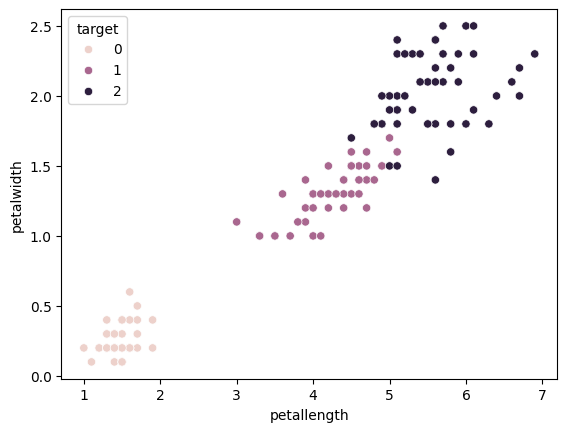

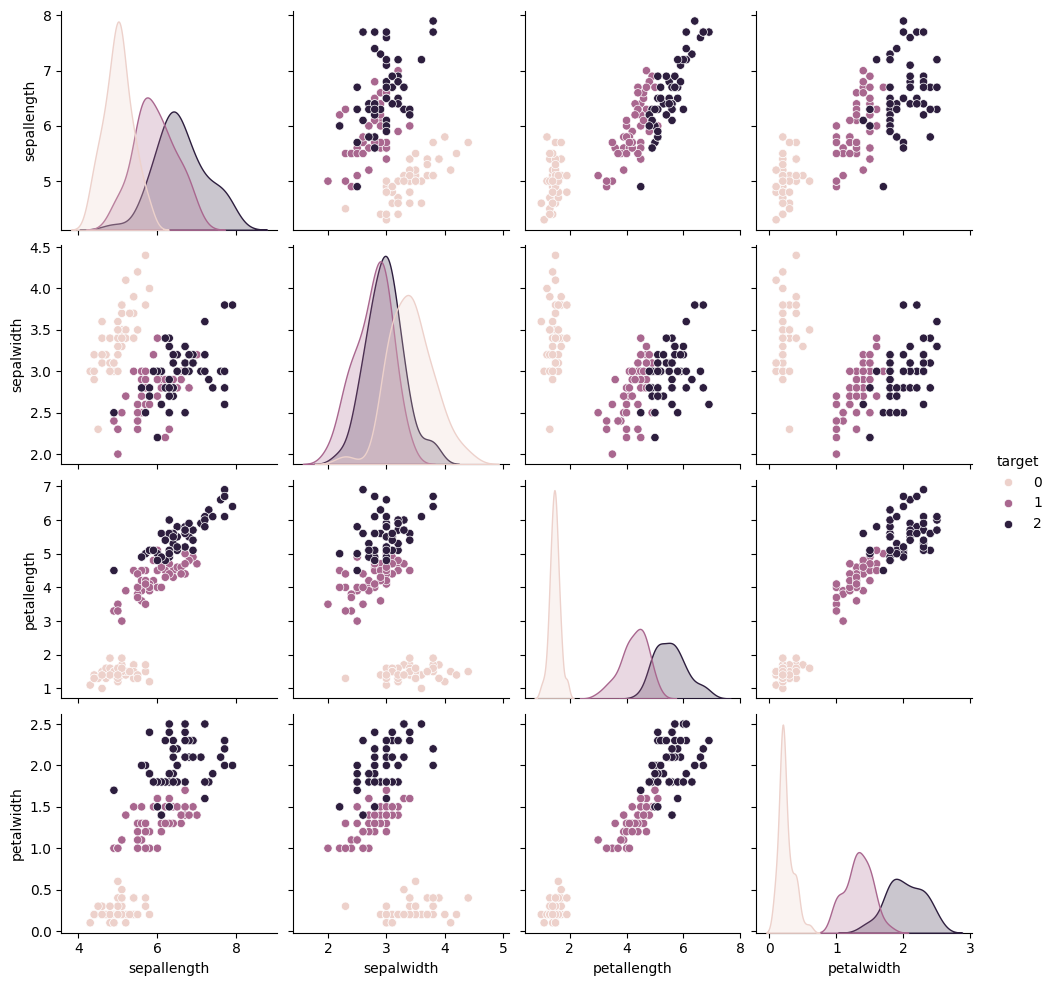

In [40]:
X['target'] = y
sns.scatterplot(x='petallength', y= 'petalwidth',hue='target', data=X)
plt.show()
sns.pairplot(X, hue='target')
plt.show()
X = X.drop('target', axis=1)

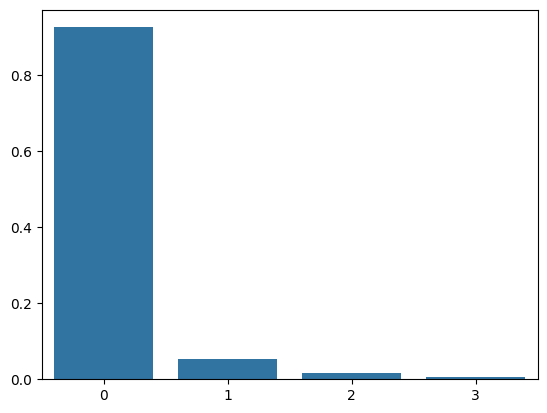

In [29]:
pca = PCA()
pca.fit(X)

# splitting dataset
explained_variance_ratio = pca.explained_variance_ratio_
sns.barplot(x=np.arange(len(explained_variance_ratio)), y=explained_variance_ratio)
plt.show()

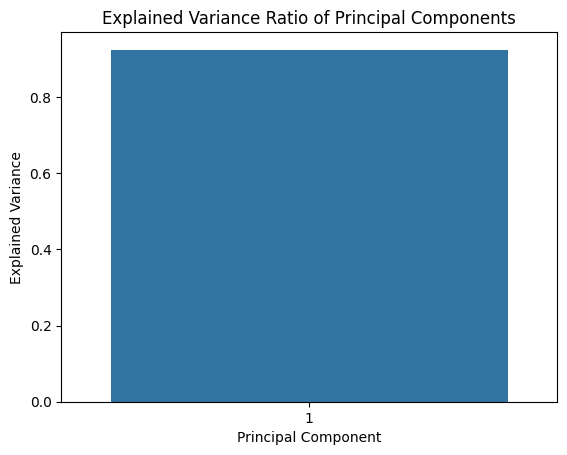

In [30]:
# applying PCA
pca_reduced = PCA(n_components=1)
X_reduced = pca_reduced.fit_transform(X)

# plotting explained variance ratio
sns.barplot(x=np.arange(1, 2), y=pca_reduced.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10), 
    max_iter=1000, 
    random_state=42
)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

Accuracy: 0.9333333333333333


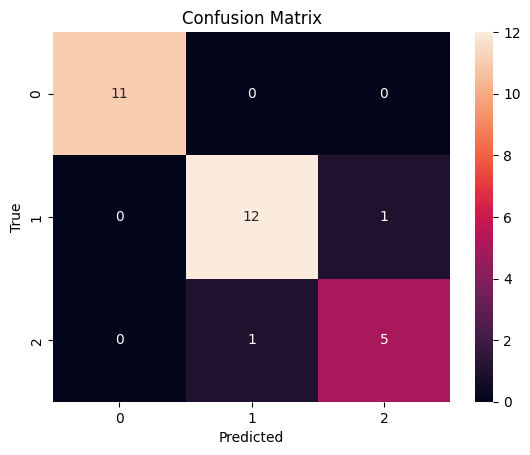

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()